# Practical No. 3
### Aim: To perform and implement Multi-Layer perceptron (MLP's) in Neural Network

#### *importing necessary libraries, loading the dataset and describing the data*

In [16]:
import numpy as np
import pandas as pd

dataset=pd.read_csv("HR_comma_sep.csv")
dataset.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [17]:
dataset.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [18]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [19]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### *feature lebel encoding*

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label_encoder=LabelEncoder()
dataset['salary']=label_encoder.fit_transform(dataset['salary'])

In [23]:
dataset['Department']=label_encoder.fit_transform(dataset['Department'])

In [24]:
dataset.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1
14998,0.37,0.52,2,158,3,0,1,0,8,1


#### *Seggregating dependent and Independent variables*

In [25]:
X=dataset[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','Department','salary']]
Y=dataset['left']

#### *Separating data into train and test data*

In [26]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [27]:
X_train.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
12602,0.10,0.84,7,250,4,0,0,6,1
4889,0.57,0.68,4,154,3,1,0,4,2
1572,0.39,0.48,2,154,3,0,0,9,1
13375,0.91,0.68,4,132,4,0,0,0,2
879,0.82,0.97,5,263,5,0,0,9,2


#### *building neural network model for classification*

In [28]:
from sklearn.neural_network import MLPClassifier

clf=MLPClassifier(hidden_layer_sizes=(6,5),random_state=5,verbose=True,learning_rate_init=0.01)

clf.fit(X_train,Y_train)

Iteration 1, loss = 0.61512605
Iteration 2, loss = 0.57545658
Iteration 3, loss = 0.55823146
Iteration 4, loss = 0.53011644
Iteration 5, loss = 0.50549749
Iteration 6, loss = 0.48004244
Iteration 7, loss = 0.47915513
Iteration 8, loss = 0.46239153
Iteration 9, loss = 0.47441120
Iteration 10, loss = 0.46241650
Iteration 11, loss = 0.45068143
Iteration 12, loss = 0.45071101
Iteration 13, loss = 0.45213613
Iteration 14, loss = 0.46049483
Iteration 15, loss = 0.45897398
Iteration 16, loss = 0.46170601
Iteration 17, loss = 0.45527116
Iteration 18, loss = 0.44996595
Iteration 19, loss = 0.44982305
Iteration 20, loss = 0.45384764
Iteration 21, loss = 0.46981282
Iteration 22, loss = 0.45010489
Iteration 23, loss = 0.46852413
Iteration 24, loss = 0.45242336
Iteration 25, loss = 0.45769894
Iteration 26, loss = 0.45074974
Iteration 27, loss = 0.44067556
Iteration 28, loss = 0.43205930
Iteration 29, loss = 0.41680331
Iteration 30, loss = 0.40752887
Iteration 31, loss = 0.39186392
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

#### *Predict the result for test data*

In [29]:
y_predict=clf.predict(x_test)

#### *evaluating the model by calculating the accuracy of the model/*

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix

ac=accuracy_score(y_predict,y_test)

In [31]:
print(ac)

0.9386666666666666


In [32]:
print(confusion_matrix(y_predict,y_test))

[[3248   96]
 [ 180  976]]


#### EDA and data visualization

In [33]:
import matplotlib.pyplot as plt

In [34]:
import seaborn as sns

In [35]:
import warnings

In [36]:
warnings.filterwarnings("ignore")

In [37]:
x=dataset.drop(columns=['left'])
y=dataset.left

In [38]:
x_train,X_test,y_train,Y_test=train_test_split(x,y,test_size=1/3,random_state=5)


In [39]:
print("Ratio of work who left in train:",y_train.sum()/y_train.count())
print("Ratio of work who left in test:",Y_test.sum()/Y_test.count())

Ratio of work who left in train: 0.23502350235023503
Ratio of work who left in test: 0.2442


In [40]:
print("Accuracy:",1-Y_test.sum()/Y_test.size)

Accuracy: 0.7558


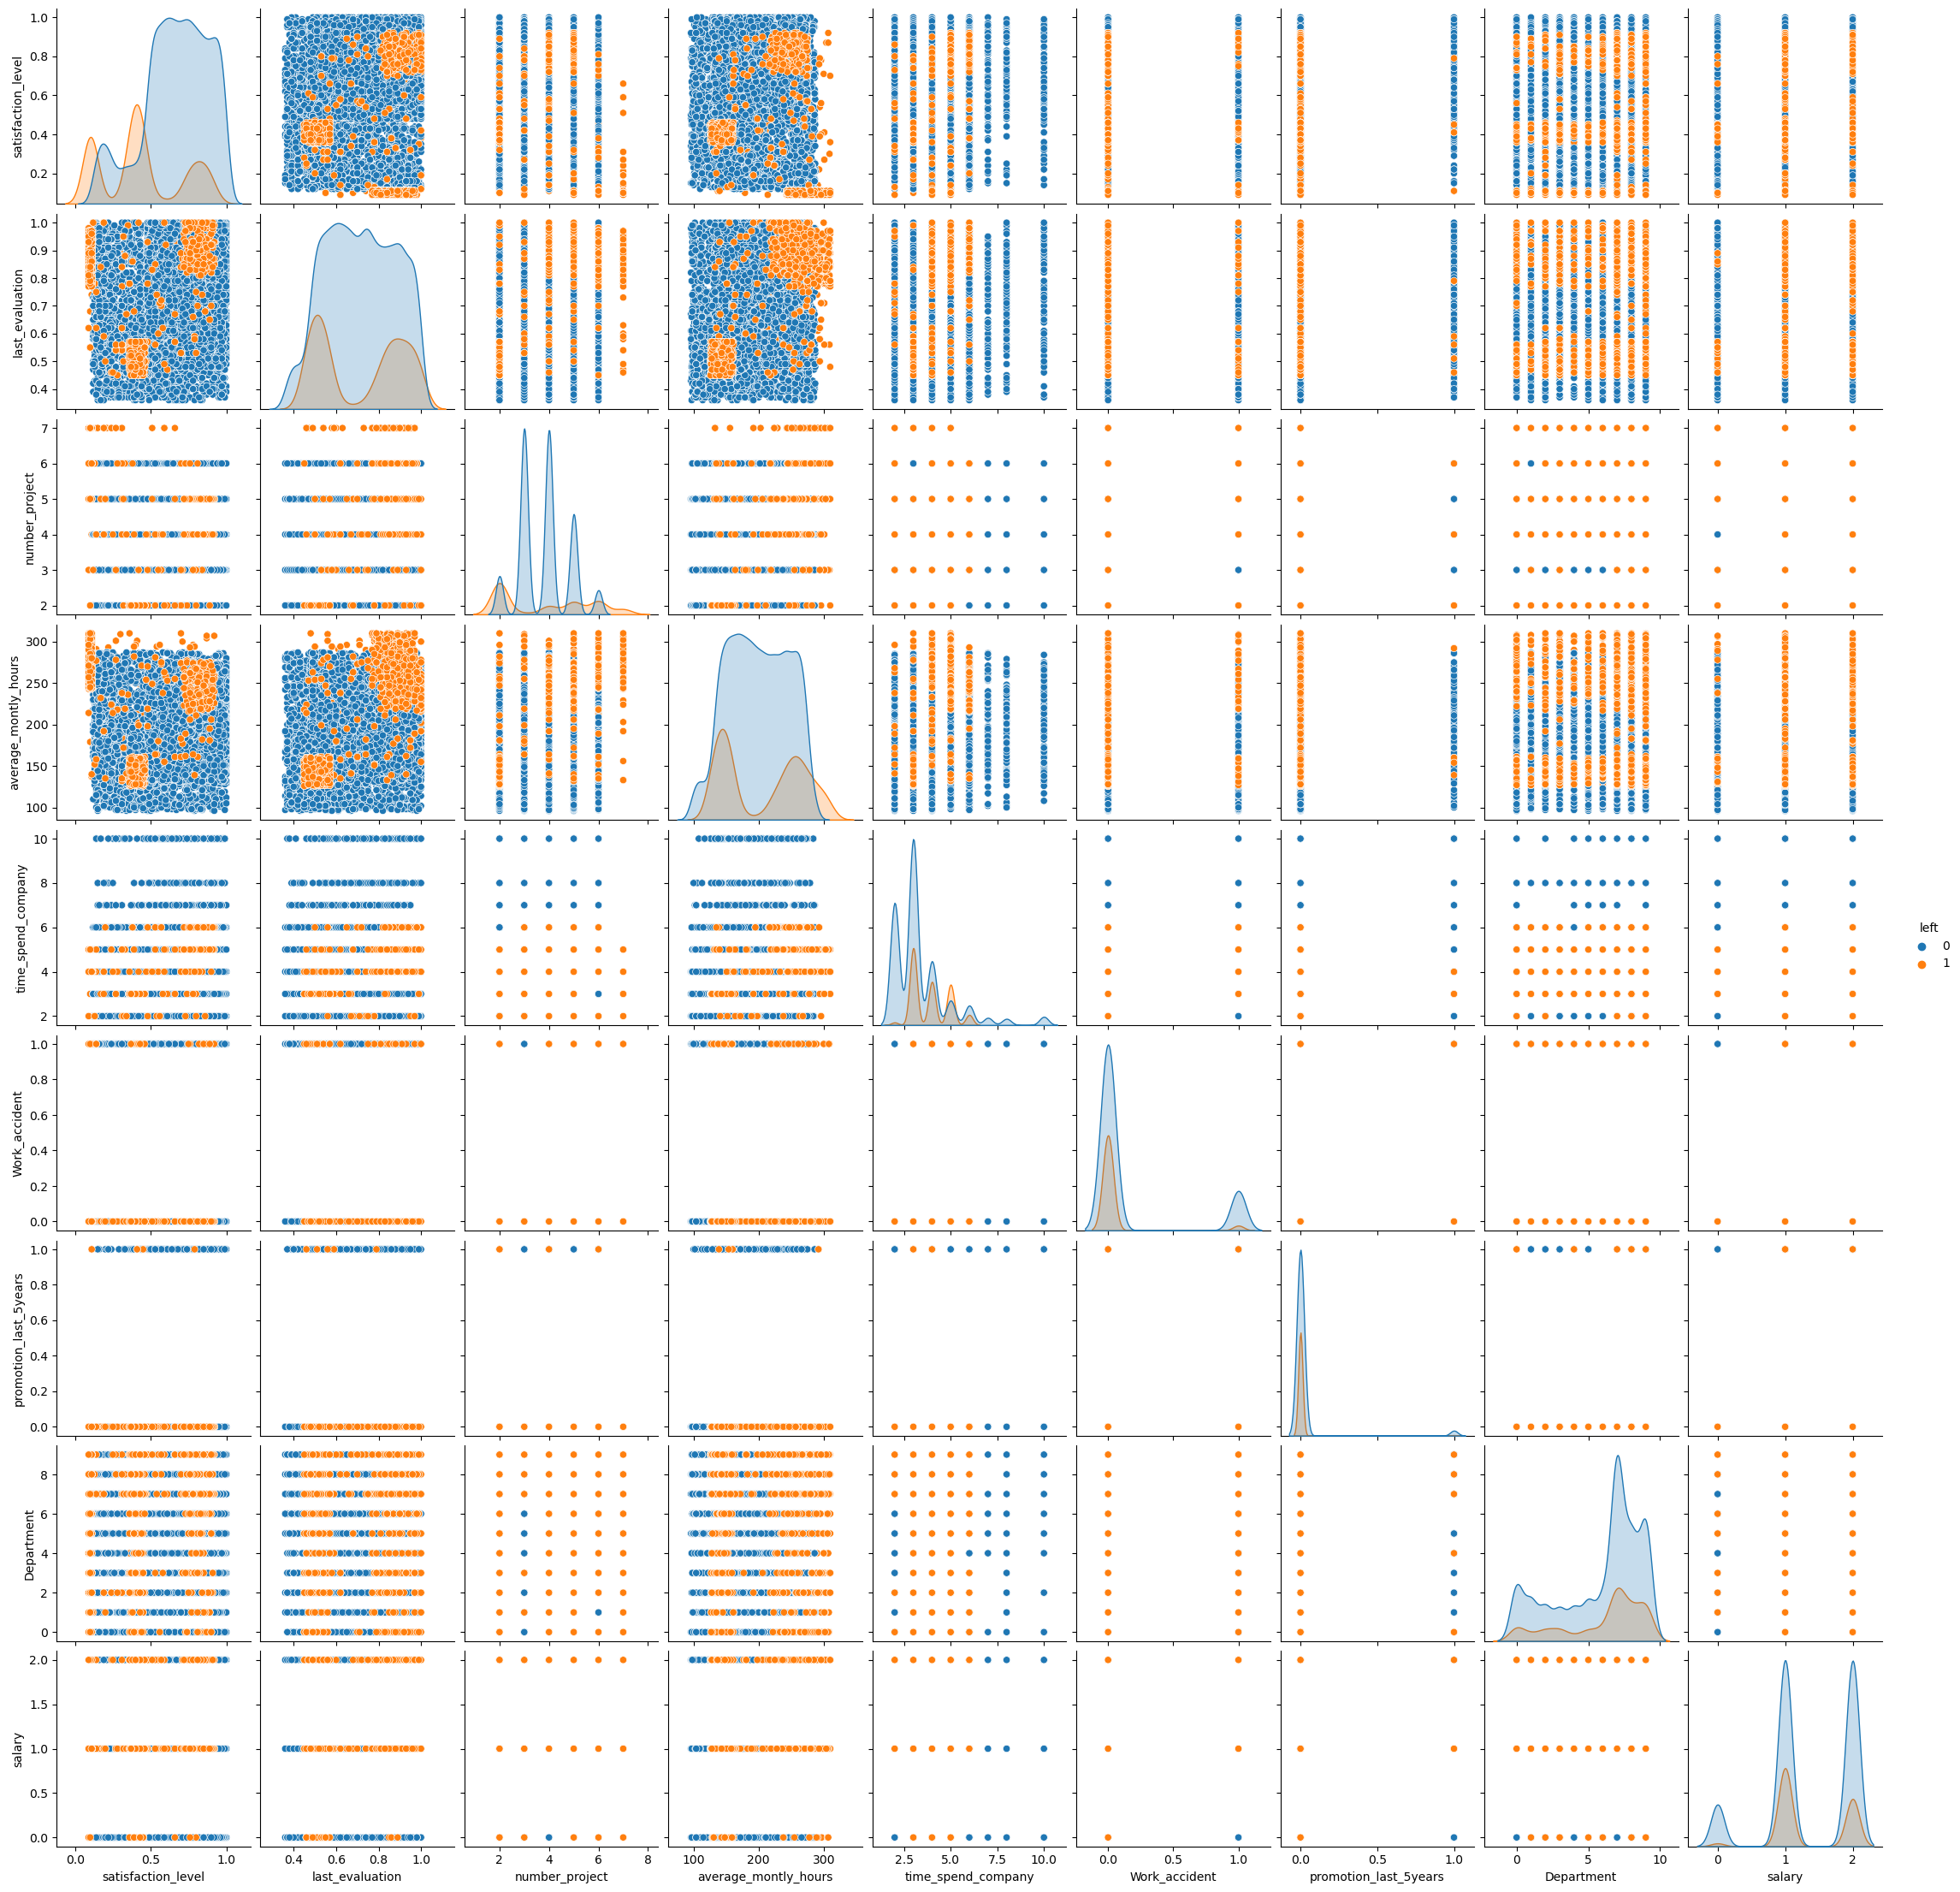

In [42]:
sns.pairplot(data=dataset,hue='left')